# Lista 1 - IND2601 - Ilan Grynszpan - 2024.1

## Setup

In [1]:
using Pkg

Pkg.add(["JuMP", "HiGHS", "Plots", "DecisionProgramming", "CalculusWithJulia", "XLSX", "DataStructures"])

using Plots, HiGHS, JuMP, DecisionProgramming, CalculusWithJulia, XLSX, DataStructures

   Resolving package versions...
  No Changes to `C:\Users\ilang\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\ilang\.julia\environments\v1.10\Manifest.toml`


## Questão 4

**Dados**

Atualmente:

- Produção: $Q_{0} = 100$ Peças por ano
- Custo de produção por peça: $c_{0} = 1$

Se empresa abrir novo parque:

- Total de peças a serem produzidas por ano na nova fábrica: $Q$
- Capacidade máxima de produção da fabrica por ano = $\overline{Q} = 200$
- Custo de produção: $c(Q) = 0.01 \times Q^{2}$
- Montante por peça por ano: $I = 15$
- Tempo total de construção da nova fabrica: 3 anos (0, 1, 2)
- Vida útil da fabrica: 40 anos (Ano 43)
- Custo de oportunidade = 5% ao ano

Não muda:

- Preço da venda das peças: $\pi_{0} = 3/peça$

**Questão**

Empresa deseja maximizar o Valor Presente do fluxo financeiro (VP)


### a)

Primeiro precisamos definir quais decisões podemos tomar. As decisões passam primeiramente por abrir ou não o parque industrial no Norte do Brasil ou não. Uma vez aberto o parque industrial, precisamos definir quanto produzir:

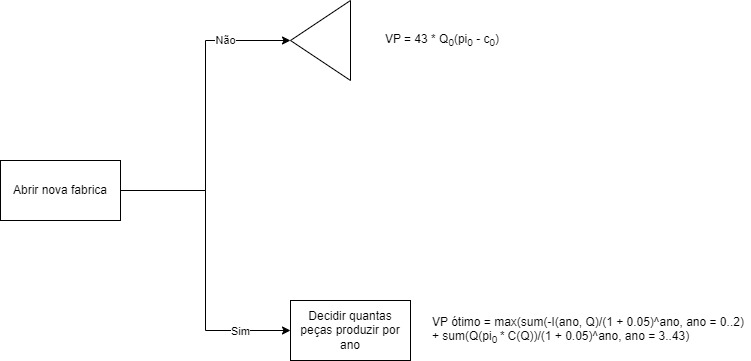

Primeiro, trabalharemos com a hipótese de que escolhemos abrir a nova fabrica e iremos produzir o valor máximo de 200 peças ao ano.

In [3]:
# Fabrica nova

Q_nova_fabrica = 200;
pi_0 = 3;
c_q = 0.01 * Q_nova_fabrica ^ 2
i = 0.05;
I = 15 * Q_nova_fabrica;

# Fabrica antiga

q_0 = 100;
c_0 = 1

# Calculando VP

VP = 0;

for ano_construcao in 0:3
    VP -= I/((1 + i)^ano_construcao)
end

for ano_util in 3:43
    VP += ((Q_nova_fabrica * (pi_0 - c_q)) / ((1 + i)^ano_util))
end
    
# Juntando ao VP da primeira fabrica

for ano in 0:43
    VP += (q_0 * (pi_0 - c_0)) / ((1 + i) ^ ano) 
end

print(round(VP, digits=2))

-1.25296878e6

**Obtivemos um prejuízo de mais de um milhão de unidades monetárias, logo, esta não é uma decisão ótima.**

### b)

Para chegarmos à capacidade ótima, temos o seguinte problema

\begin{align}
VP_{ótimo} = \max_{Q}{\sum_{ano = 0}^{ano=43}{\frac{100(3 - 1)}{(1 + 0.05)^{ano}}} + \sum_{ano = 0}^{ano = 2}{\frac{15 \times Q}{(1 + 0.05)^{ano}}} + \sum_{ano = 3}^{ano = 43}{\frac{Q \times (3 - 0.01 \times Q^{2})}{(1 + 0.05)^{ano}}}}
\end{align}

Logo, 

\begin{align}
Q_{ótimo} = argmax_{Q}{\sum_{ano = 0}^{ano=43}{\frac{100(3 - 1)}{(1 + 0.05)^{ano}}} + \sum_{ano = 0}^{ano = 2}{\frac{15 \times Q}{(1 + 0.05)^{ano}}} + \sum_{ano = 3}^{ano = 43}{\frac{Q \times (3 - 0.01 \times Q^{2})}{(1 + 0.05)^{ano}}}}
\end{align}

Logo, se transforma em um problema de otimização não linear

Derivando $Q_{ótimo} em Q, temos$

\begin{align}
\frac{d(Q_{ótimo})}{dQ} = \sum_{ano = 0}^{ano = 2}{\frac{15}{1.05^{ano}}} + \sum_{ano = 3}^{ano = 43}{\frac{1}{1.05^{ano}} \times (3 - 0.02 \times Q) }  
\end{align}

Igualando a zero e resolvendo, temos:

\begin{align}
\sum_{ano=3}^{ano=43}{\frac{-0.02 \times Q}{1.05^{ano}}} = (-\sum_{ano=0}^{ano=2}{\frac{15}{1.05^{ano}}} - \sum_{ano=3}^{ano=43}{\frac{3}{1.05^{ano}}})
\end{align}

Logo, resolvendo temos:

In [4]:
function part1()
    soma = 0
    for ano in 0:3
        soma += 15/(1.05^(ano))
    end
    return soma
end

function part2()
    soma = 0
    for ano in 3:43
        soma += 3/(1.05^(ano))
    end
    return soma
end

function part3()
    soma = 0
    for ano in 3:43
        soma += -0.02/(1.05^(ano))
    end
    return soma
end

print((-part1() - part2())/part3())

328.01521987304875

### c)

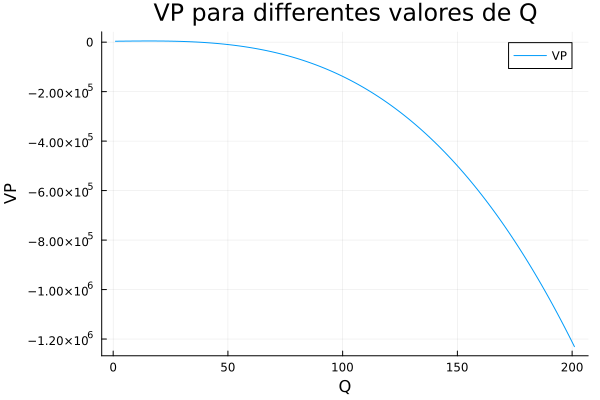

In [5]:
function decapitalize(num, year)
    return num/((1.05) ^ year)
end

function vpUtil(Q)
    return sum([decapitalize(Q * (3 - 0.01 * Q^2), year) for year in 3:43])
end

function vpConstruction(Q)
    return sum([decapitalize(15 * Q, year) for year in 0:3])
end

function vpOldFactory()
    return sum([decapitalize(200, year) for year in 0:43])
end

function vp(Q)
    return vpUtil(Q) + vpConstruction(Q) + vpOldFactory()
end

plot(
    [vp(Q) for Q in 0:200],
    label = "VP",
    plot_title = "VP para differentes valores de Q",
    xlabel="Q", 
    ylabel="VP"
)

### d)

### e)

### f)

### g)

### h)

### i)

## Questão 5

### a)

Fazendo a árvore de decisão do problema, temos:

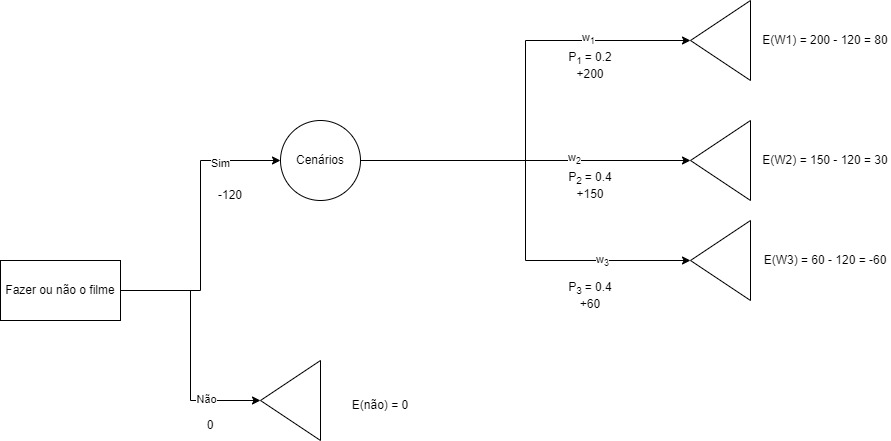

Logo:

E(Não) = 0

E(Sim) = $P_{1} \times E(W1) + P_{2} \times E(W2) + P_{3} \times E(W3)$ = $0.2 \times 80 + 0.4 \times 30 + 0.4 \times -60$ = 16 + 12 - 24 = 4

Logo

**A empresa deve produzir o filme**

### b)

Para o perfil de risco acumulado, fazemos $F_{R}{(t)} = P(R \leq t)$

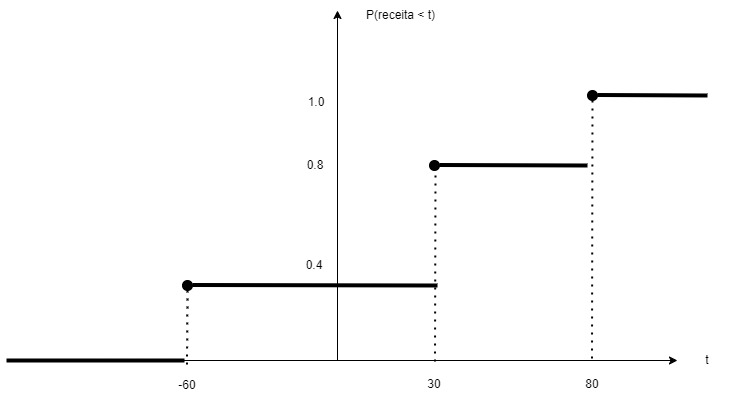

### c)

Para resolver este item, calculamos a decisão e as possibilidade (incerteza) associadas ao filme 1. Depois, calculamos a incerteza relacionada ao segundo filme (continuação) para cada possibilidade do primeiro filme. Segue abaixo o código Julia:

**Nota:** A decisão sobre fazer os filmes é tomada simultaneamente, ou seja, a decisão sobre um dos filmes não depende da decisão sobre o outro filme.

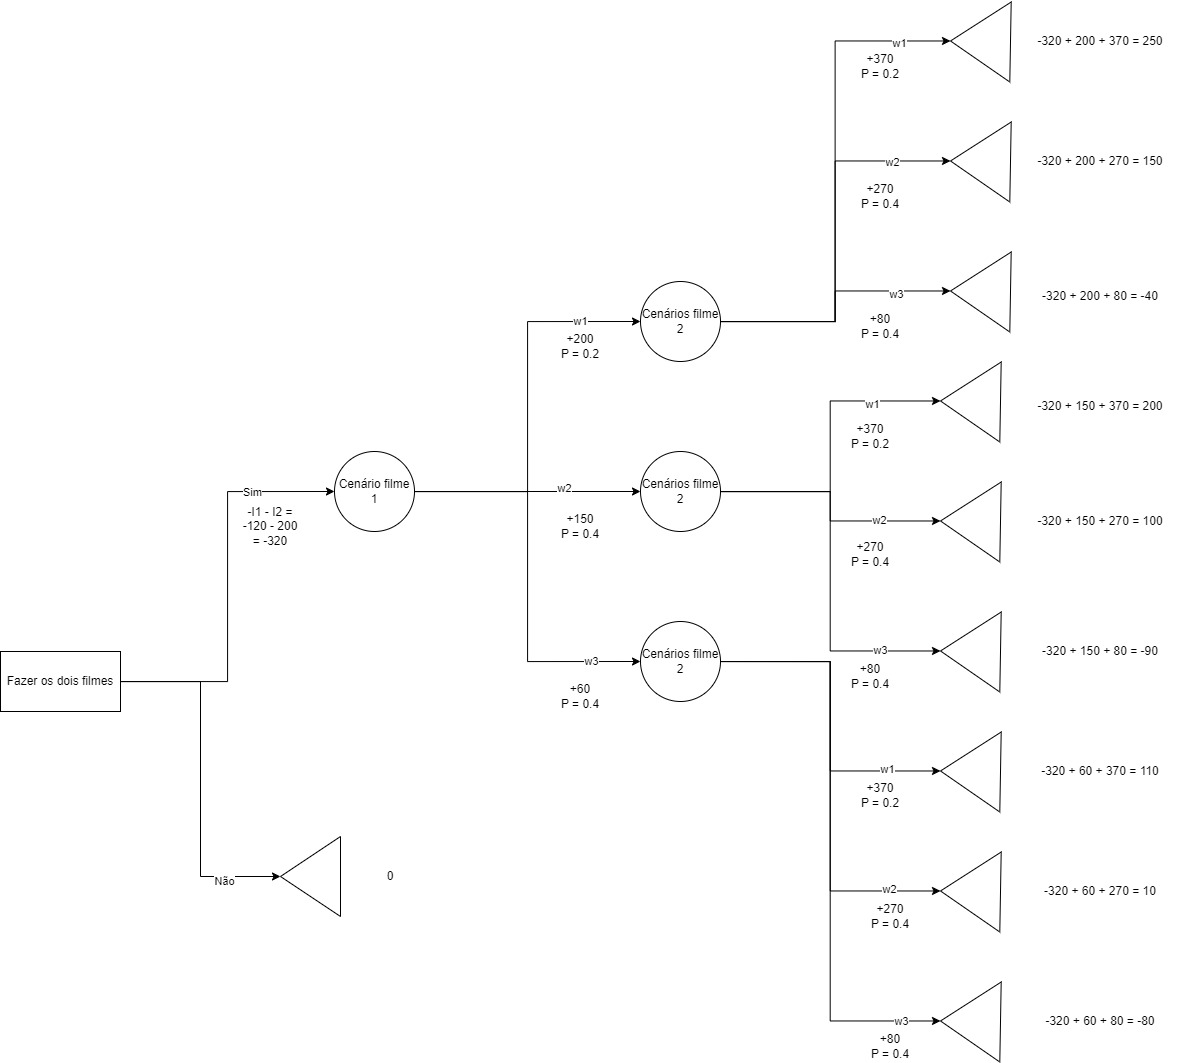

Logo, o cálculo fica conforme abaixo:

In [6]:
expectedValue = 0.2 * (0.2*250 + 0.4*150 + 0.4*-40) + 0.4 * (0.2*200 + 0.4*100 + 0.4*-90) + 0.4 * (0.2*110 + 0.4*10 + 0.4*-80)
print(expectedValue)

34.00000000000001

Como a decisão de não fazer os filmes retorna 0, temos a seguinte relação de preferência:

**Fazer ambos os filmes > Não fazer os filmes**

### d)

Assumindo que a empresa pode esperar o resultado do primeiro filme para realizar o segundo, temos:

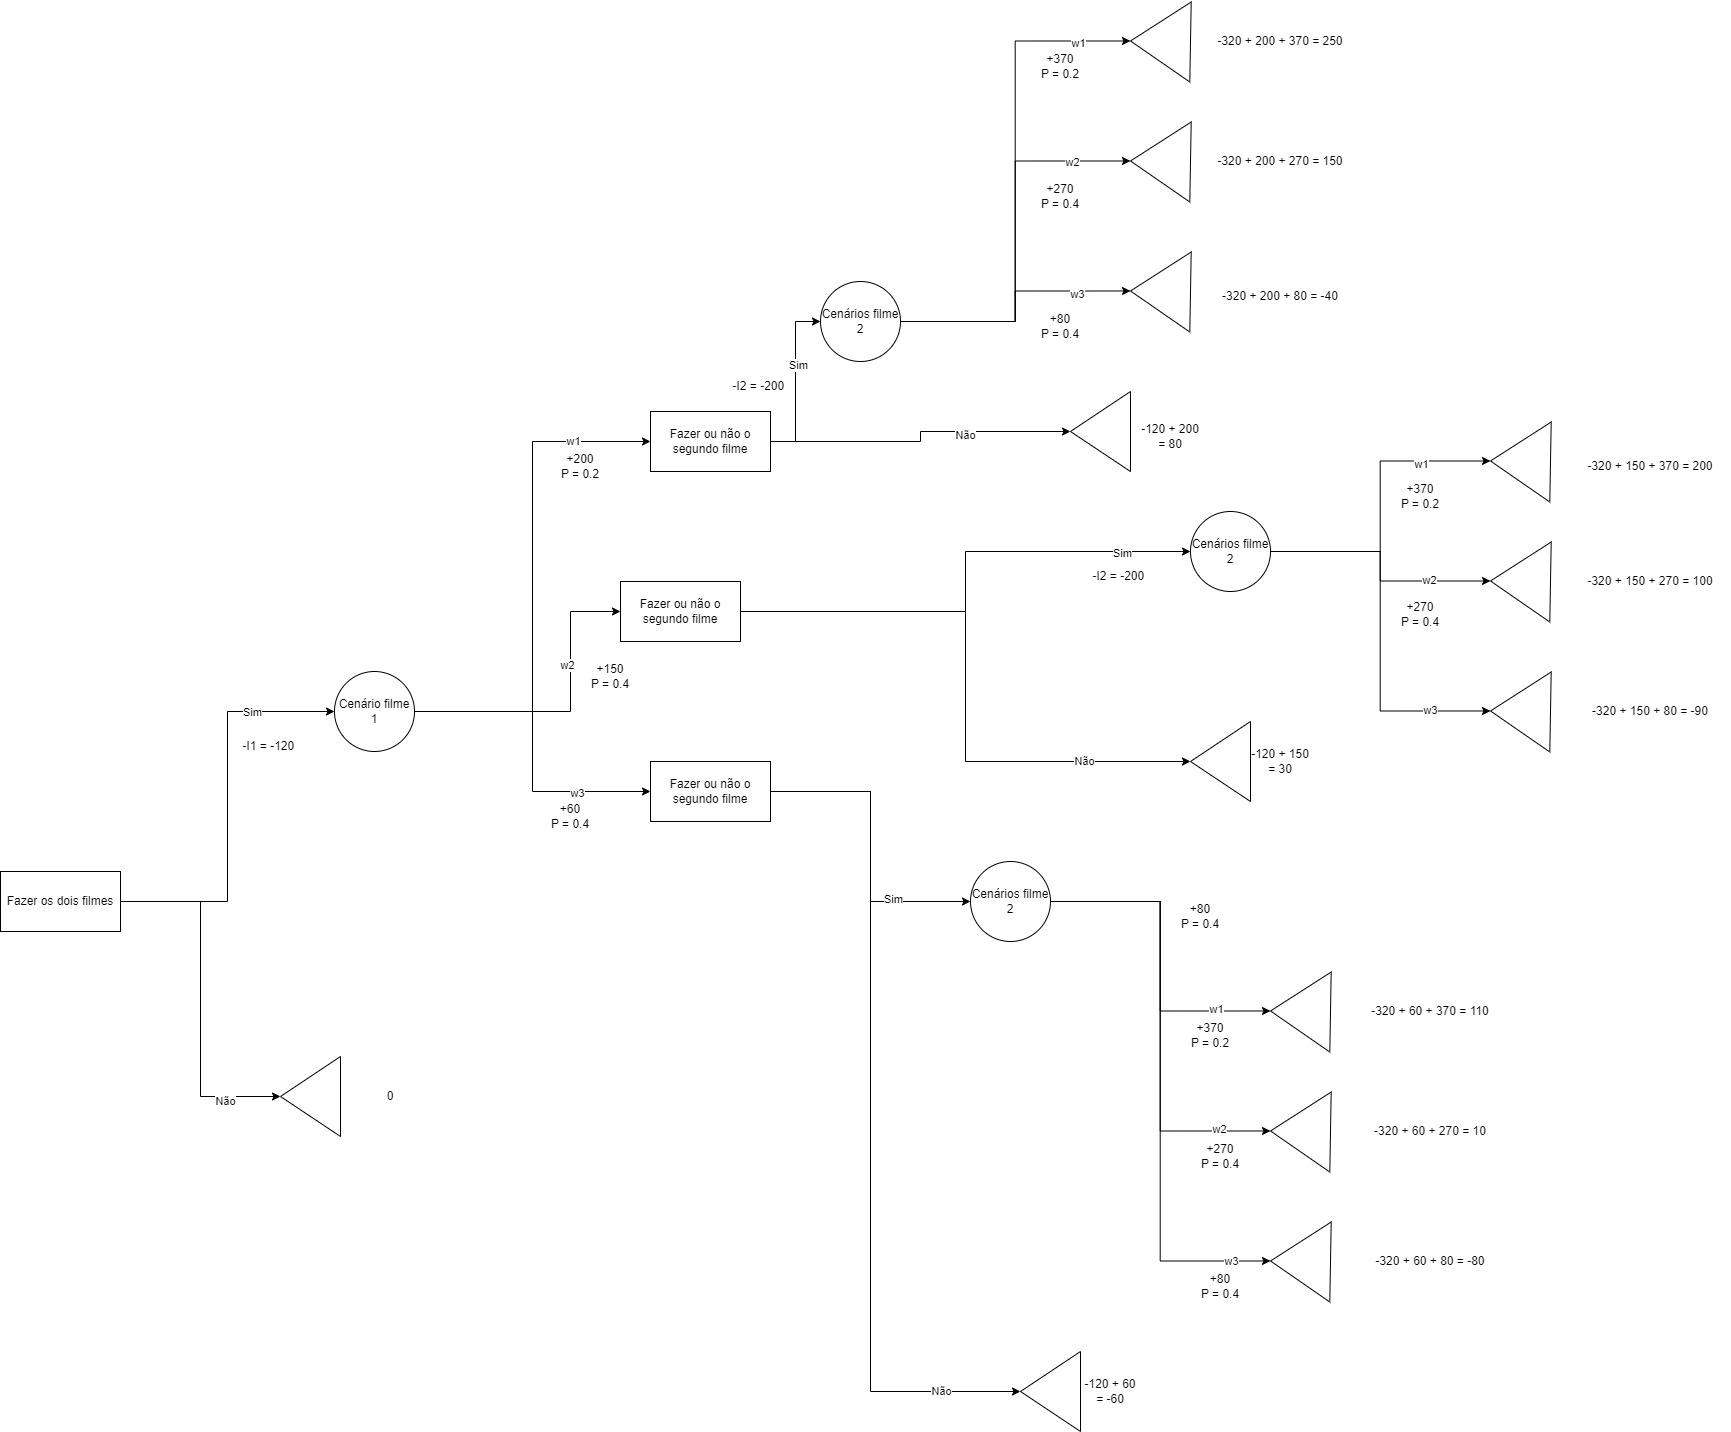

Neste caso, temos:

In [8]:
# Para o filme 1

expectedValueFazerFilme1 = 0.2 * (-120 + 200) + 0.4 * (-120 + 150) + 0.4 * (-120 + 60)

4.0

In [9]:
expectedValueFazerFilme2DadoW1ParaFilme1 = 0.2 * (0.2*250 + 0.4*150 + 0.4*-40)
expectedValueNaoFazerFilme2DadoW1ParaFilme1 = 0.2 * 80
println(expectedValueFazerFilme2DadoW1ParaFilme1)
println(expectedValueNaoFazerFilme2DadoW1ParaFilme1)

18.8
16.0


In [10]:
expectedValueFazerFilme2DadoW2ParaFilme1 = 0.4 * (0.2*200 + 0.4*100 + 0.4*-90)
expectedValueNaoFazerFilme2DadoW2ParaFilme1 = 0.2 * 30
println(expectedValueFazerFilme2DadoW2ParaFilme1)
println(expectedValueNaoFazerFilme2DadoW2ParaFilme1)

17.6
6.0


In [11]:
expectedValueFazerFilme2DadoW3ParaFilme1 = 0.4 * (0.2*110 + 0.4*10 + 0.4*-80)
expectedValueNaoFazerFilme2DadoW3ParaFilme1 = 0.4 * -60
println(expectedValueFazerFilme2DadoW3ParaFilme1)
println(expectedValueNaoFazerFilme2DadoW3ParaFilme1)

-2.4000000000000004
-24.0


Logo, temos a seguinte política ótima:

**O valor esperado de fazer o filme 1 é de 4.00, ou seja, sob esse funcional de preferência recomenda-se fazer o filme 1. Qunaot à fazer o filme 2, sob os cenários w1 e w2 para o filme 1, o valor esperado de fazer o filme 2 é maior do que o de não fazer, logo, devemos fazer o filme 3. Sob o cenário w3 para o filme 1 há prejuízo tanto ao fazer o filme 2 quanto ao não fazer, mas o prejuízo é maior se não fizer, logo, devemos fazer o filme 2.**

Temos:

**Fazer ambos os filmes > Fazer só o filme 1 > Não fazer nenhum dos filmes**

## Questão 9

### a)

Primeiramente, devemos calcular qual seria a receita em cada um dos cenários:

In [12]:
function receita(q1, q2)
    return 10 * q2 + 50 * exp(-0.5 * q1) + 5 *q1 * q2
end

receita (generic function with 1 method)

In [13]:
w1 = [-2.0 1.0]
w2 = [1.0 9.0]
w3 = [3.0 6.0]
w4 = [-1.0 4.0]
w5 = [0.0 7.0]

r1 = receita(w1[1], w1[2])
r2 = receita(w2[1], w2[2])
r3 = receita(w3[1], w3[2])
r4 = receita(w4[1], w4[2])
r5 = receita(w5[1], w5[2])

println(r1)
println(r2)
println(r3)
println(r4)
println(r5)

135.91409142295225
165.32653298563167
161.1565080074215
102.43606353500641
120.0


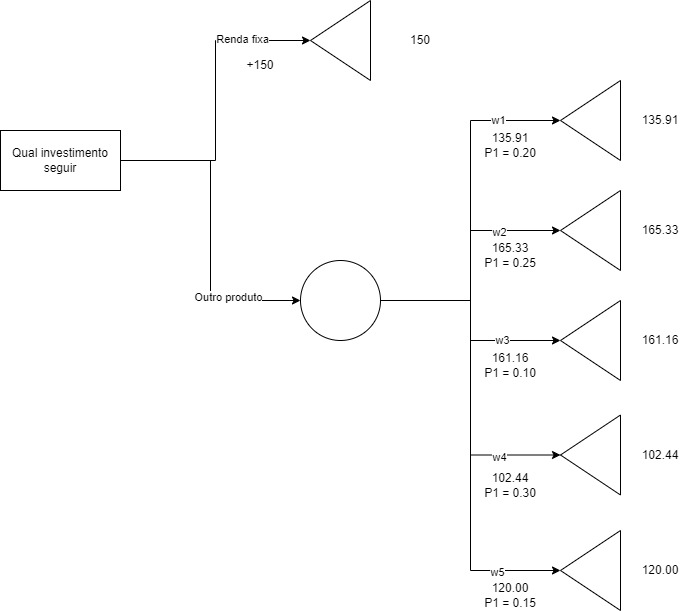

Calculando o valor esperado de escolher o outro produto:

In [14]:
P1 = 0.2;
P2 = 0.25;
P3 = 0.10;
P4 = 0.30;
P5 = 0.15;

E = r1*P1 + r2*P2 + r3*P3 + r4*P4 + r5*P5
print(E)

133.36092139224243

O perfil de risco acumulado fica:

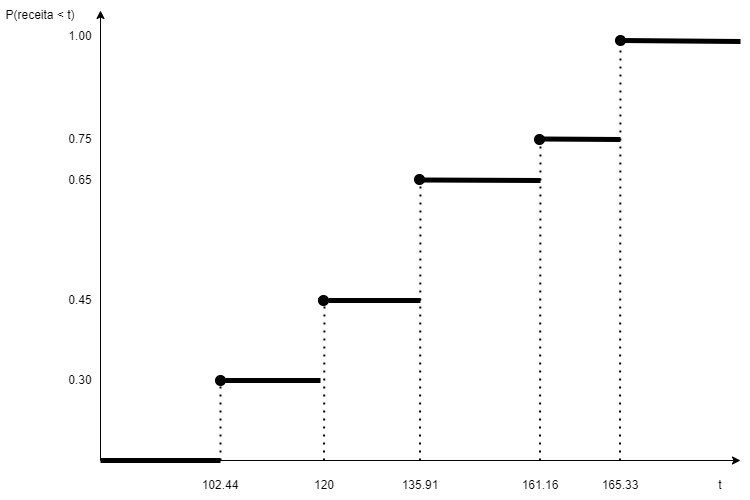

**Baseado no funcional de preferência do valor esperado, não devemos alterar o investimento. Olhando para o perfil de risco acumulado percebemos, também, que a probabilidade de ganhos superiores à renda fixa é pequena.**

### b)

O primeiro valor de ganho possível superior à renda fixa é de 161.16. Temos:

$P(receita < 161.16) = 0.65$

Logo

$P(receita >= 161.16) = 1 - 0.65 = 0.35$

**A probabilidade de ganhos superiores à renda fixa é de 0.35 ou 35%**

### c)

### d)

## Questão 14

### a)

A decisão principal desta questão está no contrato que pode ser firmado, ou seja, 

**X = {X1 = 300 MWh, X2 = 600 MWh}**

É possível observar que se forem contratados mais MWh haverá a possibilidade de o fornecedor de gás natural não conseguir entregar toda a demanda e, por consequência, uma multa será paga à prefeitura por descumprimento do contrato.

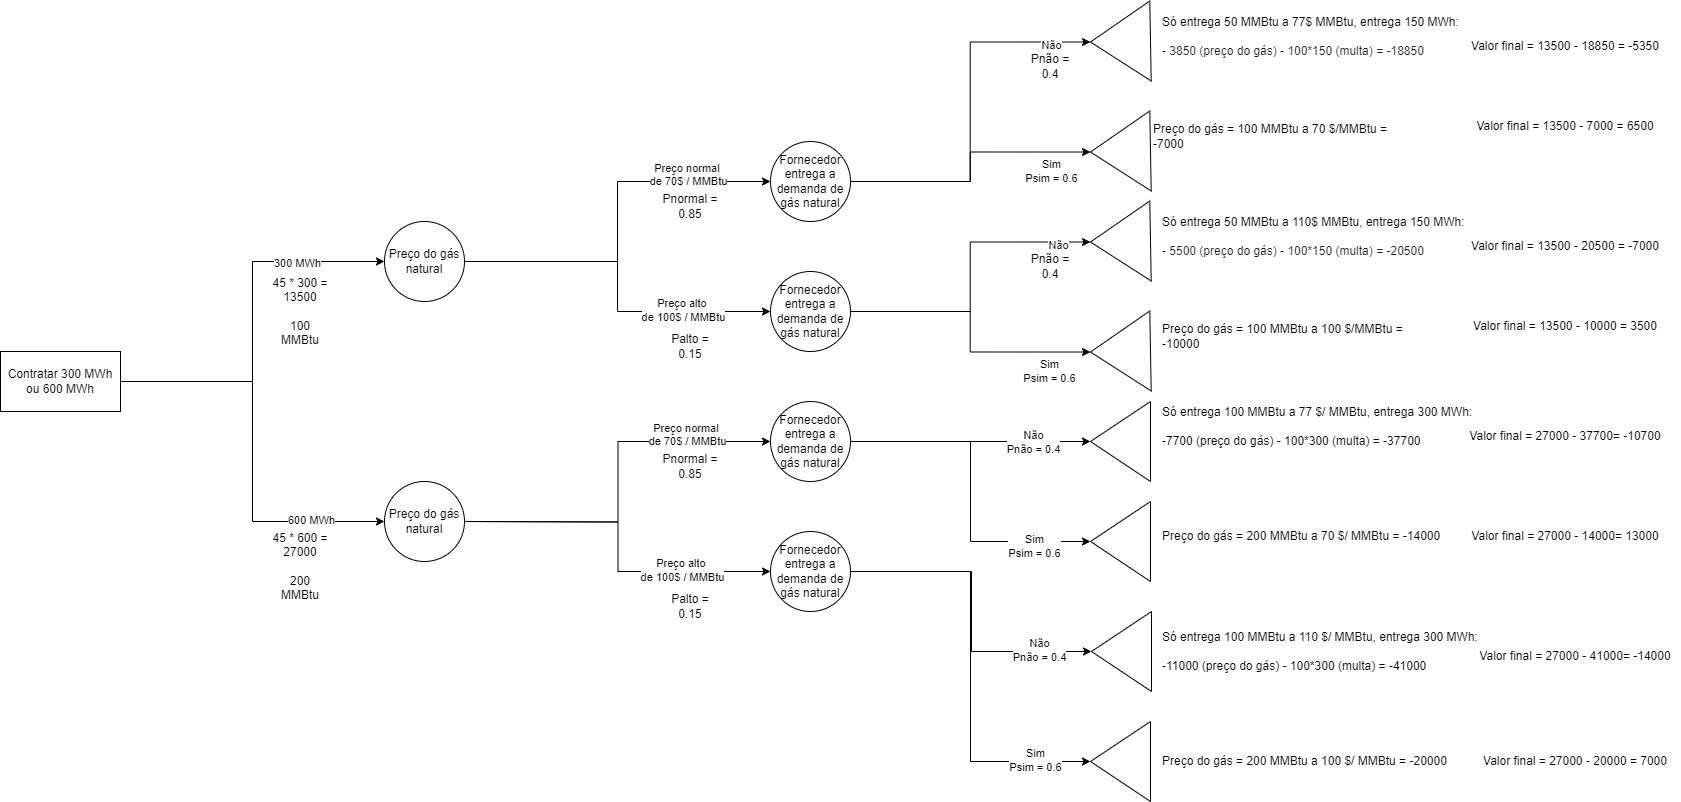

In [15]:
valorEsperado300MWh = 0.85 * (0.4*-5350 + 0.6*6500) + 0.15 * (0.4*-7000 + 0.6*3500)
valorEsperado600MWh = 0.85 * (0.4*-10700 + 0.6*13000) + 0.15 * (0.4*-14000 + 0.6*7000)

println(valorEsperado300MWh)
println(valorEsperado600MWh)

1391.0
2782.0


Logo, sendo

X1 = Contrato de 300 MWh
X2 = Contrato de 600 MWh

**Relação de preferência: X2 > X1**

### b)

Cálculo das probabilidades de cada possibilidade:

In [16]:
Pnormalnao = 0.85 * 0.4
Pnormalsim = 0.85 * 0.6
Paltonao = 0.15 * 0.4
Paltosim = 0.15 * 0.6

println(Pnormalnao)
println(Pnormalsim)
println(Paltonao)
println(Paltosim)

0.34
0.51
0.06
0.09


Para o perfil de risco acumulado, temos (?? o que é perfil de risco sem ser acumulado ??)

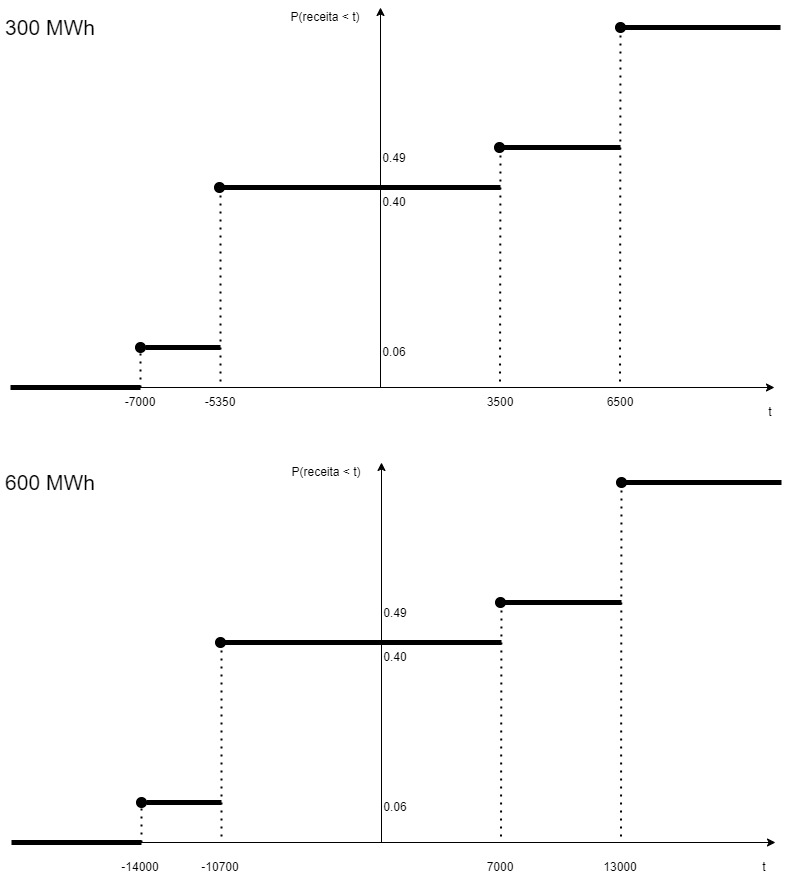

Para a decisão ótima do item A, ou seja, de contratar 600 MWh, é de $P(t \le 7000) = 0.4 = 40\%$

### c)

Para esta questão, precisamos definir o valor esperado da informação perfeita, afinal, o maior preço possível de ser pago a um especialista seria aquele pago a alguém que tivesse informação perfeita.

Precisamos, também, definir o equivalente certo das incertezas anteriores, que, a partir do funcional de preferência do valor esperado, é numericamente igual ao valor esperado das incertezas:

In [17]:
equivalenteCerto300MWh = 0.34 * -5350 + 0.51 * 6500 + 0.06 * -7000 + 0.09 * 3500
equivalenteCerto600MWh = 0.34 * -10700 + 0.51 * 13000 + 0.06 * -14000 + 0.09 * 7000

println(equivalenteCerto300MWh)
println(equivalenteCerto600MWh)

1390.9999999999998
2781.9999999999995


?? O valor a ser pago ao especialista é o equivalente certo ??

### d)

Primeiramente precisamos ler o histórico da consultoria:

In [18]:
file = XLSX.readxlsx("Questao14 - Historico Consultoria.xlsx")

XLSXFile("Questao14 - Historico Consultoria.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
Historico_Consultori… 11999x7       A1:G11999    


In [19]:
hist = file["Historico_Consultoria"]

11999×7 XLSX.Worksheet: ["Historico_Consultoria"](A1:G11999) 

In [20]:
y_pred = hist["A2:A11999"]
y_real = hist["B2:B11999"]

11998×1 Matrix{Any}:
 "Preço Alto"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Alto"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Alto"
 ⋮
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Alto"
 "Preço Normal"
 "Preço Normal"
 "Preço Normal"
 "Preço Alto"
 "Preço Normal"
 "Preço Normal"
 "Preço Alto"

A probabilidade de a consultoria prever "Preço Normal", considerando a lei estatística de que a frequência relativa amostral converge para a probabilidade, é dada por:

In [21]:
pPrecoNormal = count(i -> (i == "Preço Normal"), y_pred)/length(y_pred)

0.6586931155192532

**A probabilidade de a consultoria prever "Preço Normal" é de 66%**

In [22]:
y = [y_pred y_real]

11998×2 Matrix{Any}:
 "Preço Alto"    "Preço Alto"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Alto"
 "Preço Alto"    "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Normal"
 "Preço Alto"    "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Alto"
 ⋮               
 "Preço Alto"    "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Alto"
 "Preço Alto"    "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Alto"
 "Preço Normal"  "Preço Normal"
 "Preço Normal"  "Preço Normal"
 "Preço Alto"    "Preço Alto"

In [23]:
c = 0
t = 0
for elem in 1:(length(y[:,1]))
    if y[elem,1] == "Preço Normal" && y[elem,2] == "Preço Alto"
        c+=1
    end
    if y[elem,1] == "Preço Normal"
        t += 1
    end
end

println(c)
println(t)
println(c/t)

289
7903
0.036568391749968364


Logo, **a probabilidade de, dado que a consultoria disse que seria preço normal, ser preço alto é de 3,66%**.

### e) Dúvida

## Questão 15

### a)

Dados:

- P = 120 \$/Kg (de ouro)
- Caso haja deficit de produção: $\pi^{c} = 600 \$/kg$
- Caso haja excedente de produlão: $\pi^{v} = 12 \$/kg$

Logo:

\begin{align}
R(Q, g) =  P \times Q - \pi^{c}(\max{Q - g, 0}) + \pi^{v}(\max{g - Q, 0})
\end{align}

### b)

In [24]:
P = 120;
pi_c = 600;
pi_v = 12;

function R(Q, g)
    mQG = 0;
    if Q - g > 0
        mQG = Q - g
    end
    mGQ = 0;
    if g - Q > 0
        mGQ = g - Q
    end
    return P*Q - pi_c*mQG + pi_v*mGQ;
end

R (generic function with 1 method)

Para o cenário w1:

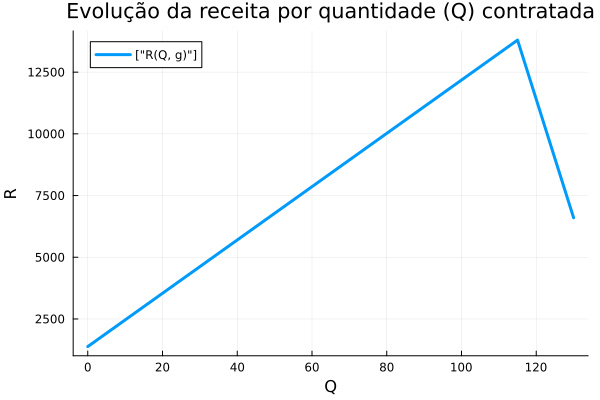

In [25]:
g = 115;

rY = zeros(0);

for Q in 0:130
    append!(rY, R(Q, g))
end

plot(0:130, rY, title="Evolução da receita por quantidade (Q) contratada", label=["R(Q, g)"], linewidth=3, xlabel = "Q", ylabel = "R")

Para o cenário 2:

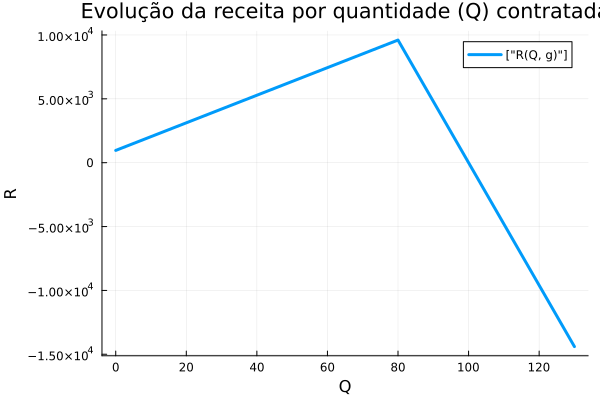

In [26]:
g = 80;

rY = zeros(0);

for Q in 0:130
    append!(rY, R(Q, g))
end

plot(0:130, rY, title="Evolução da receita por quantidade (Q) contratada", label=["R(Q, g)"], linewidth=3, xlabel = "Q", ylabel = "R")

Colocando ambos os cenários juntos:

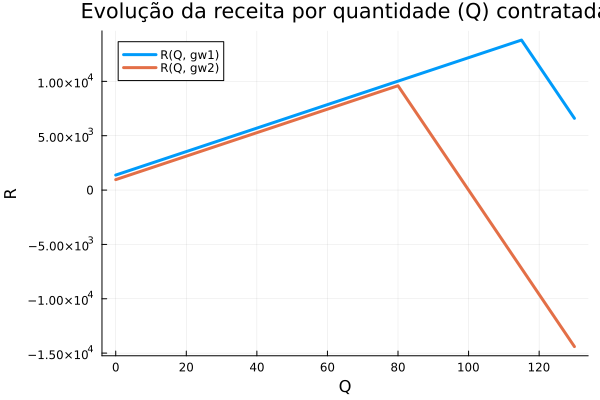

In [27]:
g1 = 115;
g2 = 80;

rY1 = zeros(0);
rY2 = zeros(0);

for Q in 0:130
    append!(rY1, R(Q, g1));
    append!(rY2, R(Q, g2))
end

plot(0:130, [rY1, rY2], title="Evolução da receita por quantidade (Q) contratada", label=["R(Q, gw1)" "R(Q, gw2)"], linewidth=3, xlabel = "Q", ylabel = "R")

O maior valor para os dois casos:

In [28]:
max_value, index = findmax(rY1)
println(max_value)
println(index)

13800.0
116


In [29]:
max_value, index = findmax(rY2)
println(max_value)
println(index)

9600.0
81


Como a contagem de índices no Julia começa em 1, e não em 0, as quantidades contratadas e receita máxima são:

**Para o cenário w1: Receita máxima = 13800,00 a uma quantidade Q = 115.**

**Para o cenário w2: Receita máxima = 9600,00 a uma quantidade Q = 80.**

### c)

Para um contrato de Q = 115 no cenário 2, temos:

In [30]:
println(R(115, g2))

-7200


**Um prejuízo de 7200,00**

### d)

Neste caso, temos:

\begin{align}
E(Rw1, Rw2) = 0.81 \times R(Q, g_{w1}) + 0.19 \times R(Q, g_{w2})
\end{align}

Obtendo a solução ótima:

In [31]:
rY = zeros(0);

for Q in 0:130
    append!(rY, 0.81*R(Q, g1) + 0.19*R(Q, g2))
end
    
max_value, index = findmax(rY)
println(max_value)
println(index)

9940.2
81


**Solução ótima: Contrato de Q = 80, receita máxima esperada = 9940,20.**

Receita se ocorrer o cenário 1:

In [32]:
println(R(80, g1))

10020


Se ocorrer o cenário 2:

In [33]:
println(R(80, g2))

9600


### e)

In [34]:
rY = zeros(0);

for Q in 0:130
    append!(rY, 0.82*R(Q, g1) + 0.18*R(Q, g2))
end
    
max_value, index = findmax(rY)
println(max_value)
println(index)

10020.0
116


**Solução ótima: Contrato de Q = 115, receita máxima esperada = 10020,00.**

Receita se ocorrer o cenário 1:

In [35]:
println(R(115, g1))

13800


Se ocorrer o cenário 2:

In [36]:
println(R(115, g2))

-7200


### f)

Definindo o arrependimento:

In [37]:
function regret(Q, ind)
    if ind == 1
        return R(Q, g1) - R(Q, g2)
    else
        return R(Q, g2) - R(Q, g1)
    end
end

regret (generic function with 1 method)

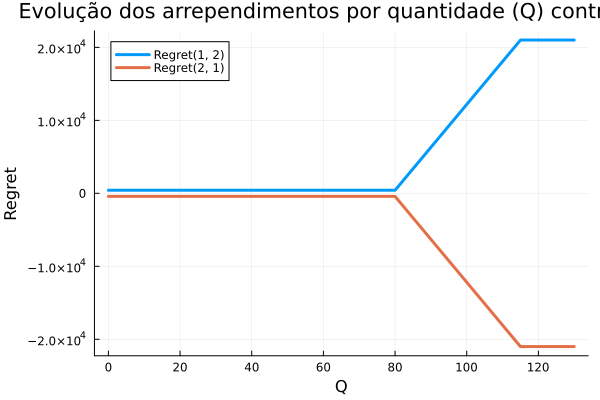

In [38]:
arr1 = zeros(0);
arr2 = zeros(0);

for Q in 0:130
    append!(arr1, regret(Q, 1));
    append!(arr2, regret(Q, 2))
end
    
plot(0:130, [arr1, arr2], title="Evolução dos arrependimentos por quantidade (Q) contratada", label=["Regret(1, 2)" "Regret(2, 1)"], linewidth=3, xlabel = "Q", ylabel = "Regret")

O maior arrependimento é minimizado na maior quantidade vendida $argmax_{Q}{\min{\max{regret}}}$ -> Q = 80.

### g)

Utilizando a decisão de contratar Q = 80, a receita para o cenário w1 fica:

In [39]:
R(80, g1)

10020

Já para o cenário w2, fica:

In [40]:
R(80, g2)

9600

### h) Dúvida